# [定义目标](http://localhost:8888/notebooks/Data/My_Road/%E5%AE%9A%E4%B9%89%E7%9B%AE%E6%A0%87.ipynb)

<font color=green>从已有数据中构建强有力特征,建立分类模型</font>

# [数据获取](http://localhost:8888/notebooks/Data/My_Road/%E6%95%B0%E6%8D%AE%E8%8E%B7%E5%8F%96.ipynb)

* 导入所需库

In [1]:
#-*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

* 导入训练数据和测试数据

In [2]:
data_train = pd.read_csv('Kaggle_Titanic/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test = pd.read_csv('Kaggle_Titanic/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
%store data_train

Stored 'data_train' (DataFrame)


# [数据理解](http://localhost:8888/notebooks/Data/Python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E4%B8%8E%E6%8C%96%E6%8E%98%E5%AE%9E%E6%88%98/%E6%95%B0%E6%8D%AE%E6%8E%A2%E7%B4%A2.ipynb)

## 表格方式理解

* <font color=blue>查看数据info</font>

In [159]:
print('训练集数据info:')
print(data_train.info())
print('********************************')
print('测试集数据info:')
print(data_test.info())

训练集数据info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
********************************
测试集数据info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket  

* <font color=red>可以看出,训练数据中'Age'和'Cabin'缺失值严重,测试数据中同样存在问题</font>
* <font color=red>其余信息基本完整</font>

* <font color=blue>查看特征分布描述</font>

In [70]:
print('训练集数据分布描述:')
print(data_train.describe())
print('********************************')
print('测试集数据分布描述:')
print(data_test.describe())

训练集数据分布描述:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    2.969697   29.689788   
std     257.353842    0.486592    0.836071    1.677405   13.737338   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    2.000000   21.000000   
50%     446.000000    0.000000    3.000000    4.000000   28.000000   
75%     668.500000    1.000000    3.000000    4.000000   37.000000   
max     891.000000    1.000000    3.000000    5.000000   80.000000   

            SibSp       Parch        Fare    Embarked  Embarked_0     ...      \
count  891.000000  891.000000  891.000000  889.000000  891.000000     ...       
mean     0.523008    0.381594   32.204208    0.362205    0.722783     ...       
std      1.102743    0.806057   49.693429    0.636157    0.447876     ...       
min      0.000000    0.000000    0

In [71]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,FamSize,IsAlone,Title,Sex_0.1,Sex_1.1,Sex_2,Sex_3,Sex_4,Sex_5
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,...,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Silvey, Mr. William Baird",NaN,NaN,NaN,NaN,347082,NaN,...,NaN,NaN,NaN,Mr,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,531,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,2.969697,29.689788,0.523008,0.381594,NaN,32.204208,...,0.551066,1.904602,0.602694,NaN,0.136925,0.105499,0.121212,0.085297,0.389450,0.161616
std,257.353842,0.486592,0.836071,NaN,1.677405,13.737338,1.102743,0.806057,NaN,49.693429,...,0.497665,1.613459,0.489615,NaN,0.343961,0.307368,0.326557,0.279481,0.487899,0.368305
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,...,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,2.000000,21.000000,0.000000,0.000000,NaN,7.910400,...,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,4.000000,28.000000,0.000000,0.000000,NaN,14.454200,...,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,4.000000,37.000000,1.000000,0.000000,NaN,31.000000,...,1.000000,2.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


* <font color=red> Survived: 获救人群仅占总人群的38.38%<font>
* <font color=red> Pclass: 绝大多数人处于3等舱席位<font>
* <font color=red> Age: 年龄缺失值多,不做过多干预分析<font>
* <font color=red> SibSp: 堂兄妹上船人数可以与Parch信息合并,作为家庭总体参照<font>
* <font color=red> Parch: 可以与SibSp合并,作为家庭成员上船人数量特征<font>
* <font color=red> Fare: 票价应该与Pclass相呼应,价格越高其实舱位等级越高,越有钱<font>

* <font color=blue>特征名及各特征维度</font>

In [161]:
unique_count_df = pd.Series()
for col in data_train.columns:
    unique_count_df[col] = len(data_train[col].unique())
unique_count_df

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

* <font color=red>由上可以看出,PassengerId基本上没什么用,Name各不相同,Ticket差别很大</font>
* <font color=red>Survived Pclass Sex SibSp Parch Embarked具有类别属性</font>

* <font color=blue>查看各维度缺失量</font>

In [162]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(data_train, data_test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


* <font color=red>缺失量与我们从info中看到的一样,这里更清晰</font>

## 图表模型

### 先从Pclass入手分析,查看乘客舱位等级与获救Survived的关系

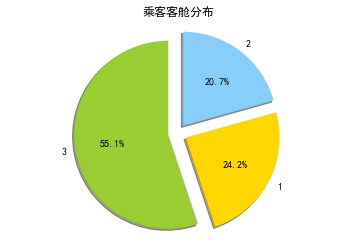

In [163]:
# 乘客客舱分布
Pclass_Series = data_train.Pclass.value_counts()/ data_train.Pclass.count()
labels = list(Pclass_Series.index)
sizes = list(Pclass_Series.values)
colors = ['yellowgreen', 'gold', 'lightskyblue'] # 每一块的颜色
explode = (0.1, 0.1, 0.1,) # 突出显示

plt.pie(sizes, explode=explode, labels=labels, \
        colors=colors, autopct='%1.1f%%', \
        shadow=True, startangle=90, pctdistance=0.6) 
# labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
# autopct，圆里面的文本格式，%1.1f%%表示小数有一位，整数有一位的浮点数
# shadow，饼是否有阴影
# startangle，起始角度，90，表示从90开始逆时针转，为第一块。一般选择从90度开始比较好看
# pctdistance，百分比的text离圆心的距离
# patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
plt.title(u"乘客客舱分布")
plt.axis('equal') # 显示为圆(避免比例压缩为椭圆)
plt.show()

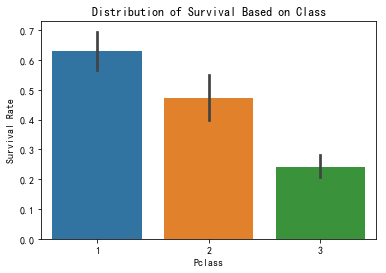

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [164]:
# 按照客舱划分的获救信息
sns.barplot(x="Pclass", y="Survived", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = data_train[data_train.Pclass == 1]["Survived"].sum()
total_survived_two = data_train[data_train.Pclass == 2]["Survived"].sum()
total_survived_three = data_train[data_train.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

* <font color=red>头等舱获救概率远高于其他舱</font>
* <font color=red>即使三等舱人数多,但获救数量也远远不及头等舱</font>
* <font color=red>舱位对最后获救有很大影响</font>

Pclass1 survival female proportion:
0.9680851063829787
Pclass1 survival male proportion:
0.36885245901639346
Pclass2 survival female proportion:
0.9210526315789473
Pclass2 survival male proportion:
0.1574074074074074
Pclass3 survival female proportion:
0.5
Pclass3 survival male proportion:
0.13544668587896252


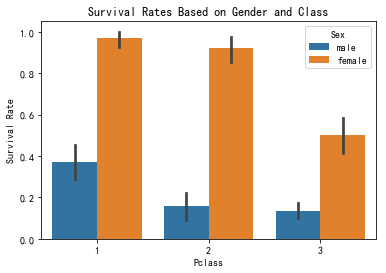

In [165]:
# 再看获救的各舱位中,男性与女性的差异
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

total_survived_one_female = data_train[(data_train.Pclass == 1)&(data_train.Sex == 'female')]["Survived"].sum()
total_one_female = data_train[(data_train.Pclass == 1)&(data_train.Sex == 'female')]['PassengerId'].count()
print('Pclass1 survival female proportion:')
print(total_survived_one_female/total_one_female)

total_survived_one_male = data_train[(data_train.Pclass == 1)&(data_train.Sex == 'male')]["Survived"].sum()
total_one_male = data_train[(data_train.Pclass == 1)&(data_train.Sex == 'male')]['PassengerId'].count()
print('Pclass1 survival male proportion:')
print(total_survived_one_male/total_one_male)

total_survived_two_female = data_train[(data_train.Pclass == 2)&(data_train.Sex == 'female')]["Survived"].sum()
total_two_female = data_train[(data_train.Pclass == 2)&(data_train.Sex == 'female')]['PassengerId'].count()
print('Pclass2 survival female proportion:')
print(total_survived_two_female/total_two_female)

total_survived_two_male = data_train[(data_train.Pclass == 2)&(data_train.Sex == 'male')]["Survived"].sum()
total_two_male = data_train[(data_train.Pclass == 2)&(data_train.Sex == 'male')]['PassengerId'].count()
print('Pclass2 survival male proportion:')
print(total_survived_two_male/total_two_male)

total_survived_three_female = data_train[(data_train.Pclass == 3)&(data_train.Sex == 'female')]["Survived"].sum()
total_three_female = data_train[(data_train.Pclass == 3)&(data_train.Sex == 'female')]['PassengerId'].count()
print('Pclass3 survival female proportion:')
print(total_survived_three_female/total_three_female)

total_survived_three_male = data_train[(data_train.Pclass == 3)&(data_train.Sex == 'male')]["Survived"].sum()
total_three_male = data_train[(data_train.Pclass == 3)&(data_train.Sex == 'male')]['PassengerId'].count()
print('Pclass3 survival male proportion:')
print(total_survived_three_male/total_three_male)

* <font color=red>各个舱位都对女性更青睐,生存机会都首先赋予女性</font>
* <font color=red>获救概率最高的是头等舱的女性,概率值96.8%</font>
* <font color=red>获救概率最低的是三等舱男性</font>

### 按照性别Sex划分

Text(0.5,1,'Survival Rates Based on Gender and Class')

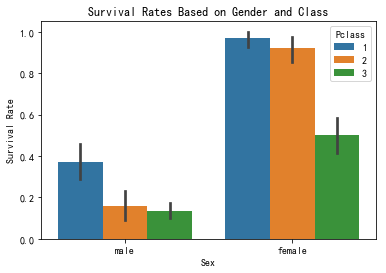

In [166]:
# 反过来,看性别分配下的各舱位获救情况
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5,1,'登船性别分布')

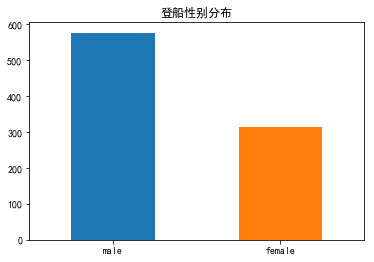

In [167]:
# 查看性别分布
Sex_counts = data_train.Sex.value_counts()
Sex_counts.plot(kind='bar', rot=0)
plt.title('登船性别分布')
# plt.grid(True)

* <font color=red>女性仅占男性的一半不到</font>

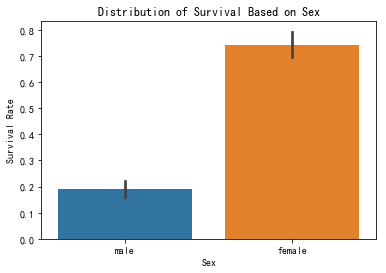

In [168]:
# 查看性别获救分布
sns.barplot(x="Sex", y="Survived", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Sex")
plt.show()

* <font color=red>虽然女性人数少,但是获救概率远远高于男性,很文明的社会</font>
* <font color=red>可以将性别作为一个主要特征来使用</font>

### 查看年龄分布

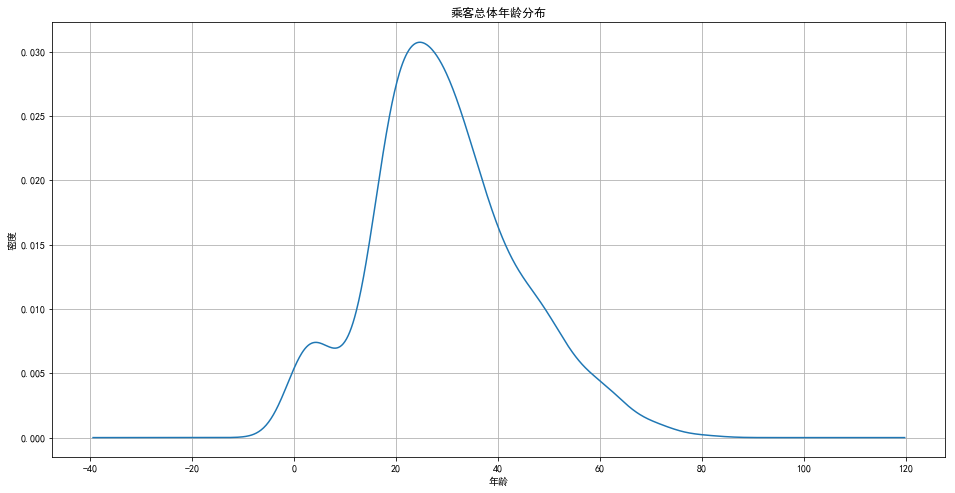

In [169]:
# 查看年龄分布
fig = plt.figure(figsize=(16,8))
data_train.Age.plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"乘客总体年龄分布")
plt.grid(True)

* <font color=red>乘客年龄基本上呈现正态分布</font>
* <font color=red>均值在22岁上下</font>

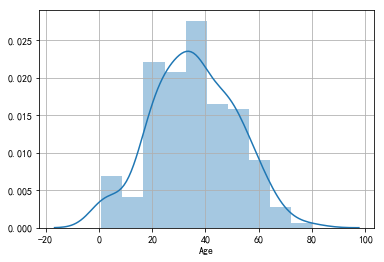

In [170]:
# 查看带有概率密度的直方图
copy = data_train.copy()
copy.dropna(inplace = True)
plt.grid(True)
sns.distplot(copy["Age"])

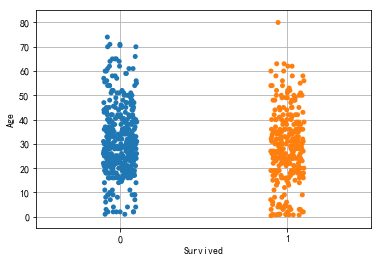

In [171]:
# 年龄与获救的散点图
sns.stripplot(x="Survived", y="Age", data=data_train, jitter=True)
plt.grid(True)

* <font color=red>有趣的现象: 很多年龄大的爷爷奶奶辈(>65)将生存机会留给了年轻人,仅有一个特别大的获救了</font>

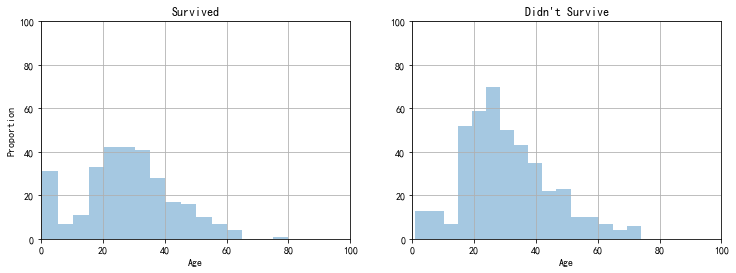

In [172]:
# 获救与非获救人群的年龄分布
survived_ages = data_train[(data_train.Survived == 1) & (data_train.Age.notna())]["Age"]
not_survived_ages = data_train[(data_train.Survived == 0) & (data_train.Age.notna())]["Age"]
plt.subplot(1, 2, 1)
plt.grid(True)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
plt.grid(True)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

* <font color=red>分布上总体呈现正态分布</font>

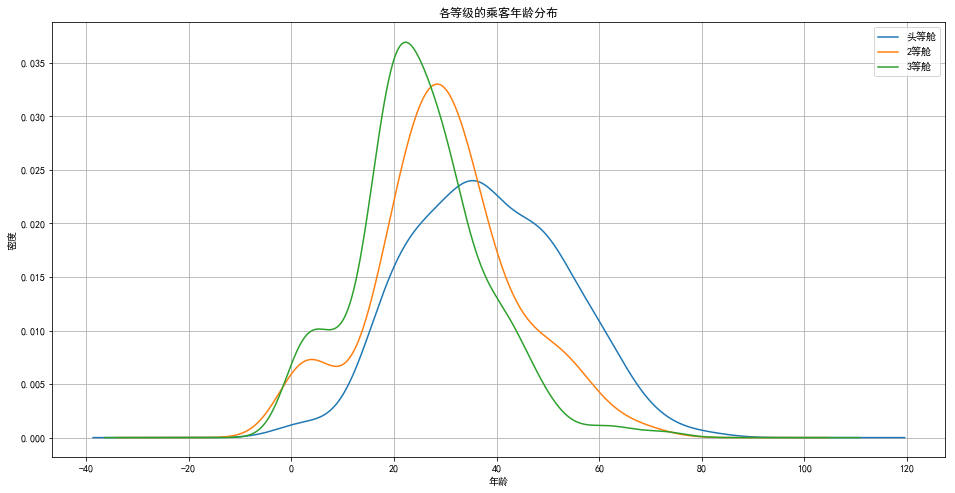

In [173]:
# 各等级的乘客年龄分布
fig = plt.figure(figsize=(16,8))
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.grid(True)
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # 设置图例

* <font color=red>没什么差别,再看看更细致的划分</font>

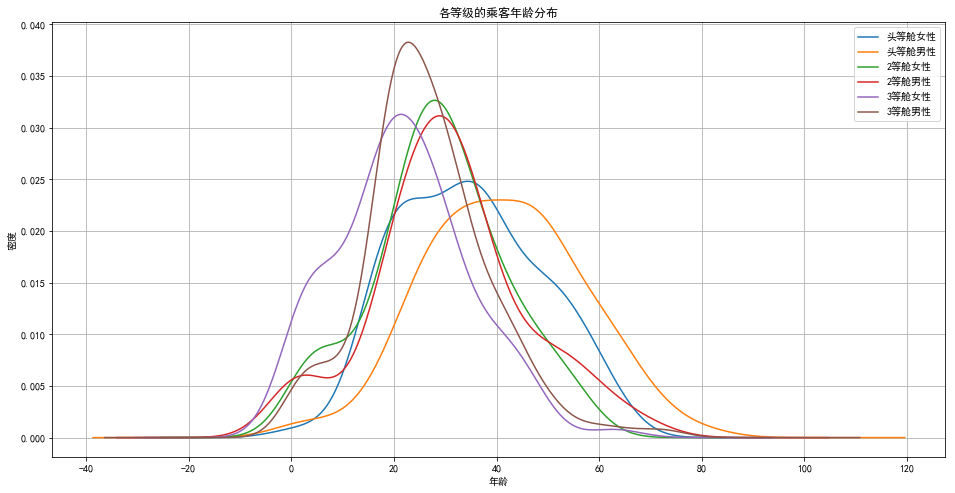

In [174]:
# 各等级各性别的乘客年龄分布
fig = plt.figure(figsize=(16,8))
data_train.Age[(data_train.Pclass == 1) & (data_train.Sex == 'female')].plot(kind='kde')
data_train.Age[(data_train.Pclass == 1) & (data_train.Sex == 'male')].plot(kind='kde')

data_train.Age[(data_train.Pclass == 2) & (data_train.Sex == 'female')].plot(kind='kde')
data_train.Age[(data_train.Pclass == 2) & (data_train.Sex == 'male')].plot(kind='kde')

data_train.Age[(data_train.Pclass == 3) & (data_train.Sex == 'female')].plot(kind='kde')
data_train.Age[(data_train.Pclass == 3) & (data_train.Sex == 'male')].plot(kind='kde')

plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.grid(True)
plt.legend((u'头等舱女性', u'头等舱男性', u'2等舱女性',  u'2等舱男性', u'3等舱女性',  u'3等舱男性'),loc='best') # 设置图例

* <font color=red>有一些差别出现了</font>

### 查看所有特征两两之间差异

In [175]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# [特征工程](http://localhost:8888/notebooks/Data/Python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E4%B8%8E%E6%8C%96%E6%8E%98%E5%AE%9E%E6%88%98/%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86.ipynb)

## Ont-Hot-Encoding

* <font color=blue>对性别和登船口岸做独热向量编码One-Hot-Encoding</font>

In [14]:
data_train.loc[data_train["Sex"] == "male", "Sex"] = 0
data_train.loc[data_train["Sex"] == "female", "Sex"] = 1

data_train.loc[data_train["Embarked"] == "S", "Embarked"] = 0
data_train.loc[data_train["Embarked"] == "C", "Embarked"] = 1
data_train.loc[data_train["Embarked"] == "Q", "Embarked"] = 2

data_test.loc[data_test["Sex"] == "male", "Sex"] = 0
data_test.loc[data_test["Sex"] == "female", "Sex"] = 1

data_test.loc[data_test["Embarked"] == "S", "Embarked"] = 0
data_test.loc[data_test["Embarked"] == "C", "Embarked"] = 1
data_test.loc[data_test["Embarked"] == "Q", "Embarked"] = 2


D:\Anaconda\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [19]:
data_train.drop(['Sex_0', 'Sex_1'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",4,22.000000,1,0,A/5 21171,7.2500,...,0.0,1,0,0,0,0,1,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,...,1.0,0,1,0,1,0,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",5,26.000000,0,0,STON/O2. 3101282,7.9250,...,0.0,1,0,0,0,0,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,...,0.0,1,0,0,1,0,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",4,35.000000,0,0,373450,8.0500,...,0.0,1,0,0,0,0,1,1,1,Mr
5,6,0,3,"Moran, Mr. James",4,24.063213,0,0,330877,8.4583,...,2.0,0,0,1,0,0,1,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,...,0.0,1,0,0,1,0,0,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",4,2.000000,3,1,349909,21.0750,...,0.0,1,0,0,0,0,1,5,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",5,27.000000,0,2,347742,11.1333,...,0.0,1,0,0,0,0,1,3,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",3,14.000000,1,0,237736,30.0708,...,1.0,0,1,0,0,1,0,2,0,Mrs


In [20]:
dummies_Sex_train = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Sex_test = pd.get_dummies(data_test['Sex'], prefix= 'Sex')

data_train = pd.concat([data_train, dummies_Sex_train], axis=1)
data_test = pd.concat([data_test,dummies_Sex_test], axis=1)

In [13]:
data_train.loc[(data_train["Sex"] == 0) & (data_train['Pclass'] == 1), "Sex"] = 0
data_train.loc[(data_train["Sex"] == 1) & (data_train['Pclass'] == 1), "Sex"] = 1

data_train.loc[(data_train["Sex"] == 0) & (data_train['Pclass'] == 2), "Sex"] = 2
data_train.loc[(data_train["Sex"] == 1) & (data_train['Pclass'] == 2), "Sex"] = 3

data_train.loc[(data_train["Sex"] == 0) & (data_train['Pclass'] == 3), "Sex"] = 4
data_train.loc[(data_train["Sex"] == 1) & (data_train['Pclass'] == 3), "Sex"] = 5

data_test.loc[(data_test["Sex"] == 0) & (data_test['Pclass'] == 1), "Sex"] = 0
data_test.loc[(data_test["Sex"] == 1) & (data_test['Pclass'] == 1), "Sex"] = 1

data_test.loc[(data_test["Sex"] == 0) & (data_test['Pclass'] == 2), "Sex"] = 2
data_test.loc[(data_test["Sex"] == 1) & (data_test['Pclass'] == 2), "Sex"] = 3

data_test.loc[(data_test["Sex"] == 0) & (data_test['Pclass'] == 3), "Sex"] = 4
data_test.loc[(data_test["Sex"] == 1) & (data_test['Pclass'] == 3), "Sex"] = 5

In [177]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [178]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


* 推荐One-Hot-Encoding方法2

In [179]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
dummies_Embarked_train = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummies_Embarked_test = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')

dummies_Sex_train = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Sex_test = pd.get_dummies(data_test['Sex'], prefix= 'Sex')

dummies_Pclass_train = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
dummies_Pclass_test = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

data_train = pd.concat([data_train,dummies_Embarked_train, dummies_Sex_train, dummies_Pclass_train], axis=1)
data_test = pd.concat([data_test,dummies_Embarked_test, dummies_Sex_test, dummies_Pclass_test], axis=1)

## 合并一些特征

In [180]:
# 合并SibSp和Parch数据到FamSize
data_train["FamSize"] = data_train["SibSp"] + data_train["Parch"] + 1
data_test["FamSize"] = data_test["SibSp"] + data_test["Parch"] + 1

In [181]:
# 利用'FamSize'特征判断成员是否独自一个人登船
data_train["IsAlone"] = data_train.FamSize.apply(lambda x: 1 if x == 1 else 0)
data_test["IsAlone"] = data_test.FamSize.apply(lambda x: 1 if x == 1 else 0)

## 提取特征

In [182]:
# 将姓名中的Ms和Mr提取出来作为特征
for name in data_train["Name"]:
    data_train["Title"] = data_train["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in data_test["Name"]:
    data_test["Title"] = data_test["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
titles = set(data_train["Title"]) #making it a set gets rid of all duplicates
print(titles)

title_list = list(data_train["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)


data_train.Title[data_train.Title == "Lady"] = 'Miss'
data_test.Title[data_test.Title == "Lady"] = 'Miss'

data_train.Title[data_train.Title == "Rev"] = 'Mr'
data_test.Title[data_test.Title == "Rev"] = 'Mr'

data_train.Title[data_train.Title == "Don"] = 'Mr'
data_test.Title[data_test.Title == "Don"] = 'Mr'

data_train.Title[data_train.Title == "Mme"] = 'Mrs'
data_test.Title[data_test.Title == "Mme"] = 'Mrs'

data_train.Title[data_train.Title == "Sir"] = 'Mr'
data_test.Title[data_test.Title == "Sir"] = 'Mr'

data_train.Title[data_train.Title == "Col"] = 'Mr'
data_test.Title[data_test.Title == "Col"] = 'Mr'

data_train.Title[data_train.Title == "Ms"] = 'Mrss'
data_test.Title[data_test.Title == "Ms"] = 'Mrss'

data_train.Title[data_train.Title == "Major"] = 'Mr'
data_test.Title[data_test.Title == "Major"] = 'Mr'

data_train.Title[data_train.Title == "Capt"] = 'Mr'
data_test.Title[data_test.Title == "Capt"] = 'Mr'

data_train.Title[data_train.Title == "Mlle"] = 'Mrss'
data_test.Title[data_test.Title == "Mlle"] = 'Mrss'

data_train.Title[data_train.Title == "Countess"] = 'Mrs'
data_test.Title[data_test.Title == "Countess"] = 'Mrs'

data_train.Title[data_train.Title == "Jonkheer"] = 'Mr'
data_test.Title[data_test.Title == "Jonkheer"] = 'Mr'

data_train.Title[data_train.Title == "Dr"] = 'Mrs'
data_test.Title[data_test.Title == "Dr"] = 'Mrs'

data_train.Title[data_train.Title == "Mrss"] = 'Miss'
data_test.Title[data_test.Title == "Mrss"] = 'Miss'

data_test.Title[data_test.Title == "Dona"] = 'Mr'

# 查看最新的分布
data_train.groupby('Title').size()
# data_test.groupby('Title').size()

{'Lady', 'Rev', 'Mr', 'Don', 'Mme', 'Mrs', 'Sir', 'Col', 'Ms', 'Major', 'Capt', 'Mlle', 'Countess', 'Miss', 'Master', 'Jonkheer', 'Dr'}
[1, 6, 517, 1, 1, 125, 1, 2, 1, 2, 1, 2, 1, 182, 40, 1, 7]
    Frequency    Titles
0           1      Lady
1           6       Rev
2         517        Mr
3           1       Don
4           1       Mme
5         125       Mrs
6           1       Sir
7           2       Col
8           1        Ms
9           2     Major
10          1      Capt
11          2      Mlle
12          1  Countess
13        182      Miss
14         40    Master
15          1  Jonkheer
16          7        Dr


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

Title
Master     40
Miss      186
Mr        531
Mrs       134
dtype: int64

In [183]:
['Master', 'Miss', 'Mr', 'Mrs']

['Master', 'Miss', 'Mr', 'Mrs']

## 缺失数据补充

In [185]:
# 补全票价缺失的一个test中信息
data_test.Fare[data_test.Fare.isnull()] = 7

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


* <font color=red>这里将年龄按照性别称呼做分类,建立随机森林进行补充数据<font>

In [186]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(data_train, data_test):
    
    title_list = ['Master', 'Miss', 'Mr', 'Mrs']
    for i in title_list:
        df_train = data_train[data_train.Title == i][['Age','Fare', 'Parch', 'SibSp', 'Pclass']]   # 把已有的数值型特征取出来丢进Random Forest Regressor中
        df_test = data_test[data_test.Title == i][['Age','Fare', 'Parch', 'SibSp', 'Pclass']]   # 把已有的数值型特征取出来丢进Random Forest Regressor中
        df = df_train.append(df_test)
 
        # 乘客分成已知年龄和未知年龄两部分
        known_age = df[df.Age.notnull()].as_matrix()
#         unknown_age = df[df.Age.isnull()].as_matrix()
        
        train_unknown_age = df_train[df_train.Age.isnull()].as_matrix()
        test_unknown_age = df_test[df_test.Age.isnull()].as_matrix()


        # y即目标年龄
        train_know_age_y = known_age[:, 0]

        # X即特征属性值
        train_know_age_X = known_age[:, 1:] # 这里与源代码比做了修改

        # fit到RandomForestRegressor之中
        rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
        rfr.fit(train_know_age_X, train_know_age_y)
    
        # 用得到的模型进行未知年龄结果预测
        train_predictedAges = rfr.predict(train_unknown_age[:, 1:])
        test_predictedAges = rfr.predict(test_unknown_age[:, 1:])
    
        # 用得到的预测结果填补原缺失数据
        data_train.loc[ (data_train.Age.isnull()) & (data_train.Title == i), 'Age' ] = train_predictedAges
        data_test.loc[ (data_test.Age.isnull()) & (data_test.Title == i), 'Age' ] = test_predictedAges

    return data_train, data_test

def set_Cabin_type(data_train, data_test):
    data_train.loc[ (data_train.Cabin.notnull()), 'Cabin' ] = "Yes"
    data_train.loc[ (data_train.Cabin.isnull()), 'Cabin' ] = "No"
    
    data_test.loc[ (data_test.Cabin.notnull()), 'Cabin' ] = "Yes"
    data_test.loc[ (data_test.Cabin.isnull()), 'Cabin' ] = "No"
    return data_train, data_test

data_train, data_test = set_missing_ages(data_train, data_test)
data_train, data_test = set_Cabin_type(data_train, data_test)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_1,Embarked_2,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,1,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,...,1,0,0,1,1,0,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,0,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,...,0,0,0,1,1,0,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,...,0,0,1,0,0,0,1,1,1,Mr
5,6,0,3,"Moran, Mr. James",0,24.063213,0,0,330877,8.4583,...,0,1,1,0,0,0,1,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,...,0,0,1,0,1,0,0,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,...,0,0,1,0,0,0,1,5,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,...,0,0,0,1,0,0,1,3,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,...,1,0,0,1,0,1,0,2,0,Mrs


In [88]:
# 不容易啊,保存一下
data_train.to_csv('titanic3_data_train_missFinish.csv', index=False)
data_test.to_csv('titanic3_test_train_missFinish.csv', index=False)

## 数据归一化

In [24]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'FamSize', 'IsAlone', 'Title', 'Sex_0', 'Sex_1', 'Sex_2',
       'Sex_3', 'Sex_4', 'Sex_5'],
      dtype='object')

In [25]:
# 接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(data_train['Age'].values.reshape(-1,1))
data_train['Age_scaled'] = scaler.fit_transform(data_train['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(data_train['Fare'].values.reshape(-1,1))
data_train['Fare_scaled'] = scaler.fit_transform(data_train['Fare'].values.reshape(-1,1), fare_scale_param)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsAlone,Title,Sex_0,Sex_1,Sex_2,Sex_3,Sex_4,Sex_5,Age_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",4,22.0,1,0,A/5 21171,7.2500,...,0,Mr,0,0,0,0,1,0,-0.560087,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,Mrs,0,1,0,0,0,0,0.605276,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",5,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Miss,0,0,0,0,0,1,-0.268746,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,Mrs,0,1,0,0,0,0,0.386770,0.420730
4,5,0,3,"Allen, Mr. William Henry",4,35.0,0,0,373450,8.0500,...,1,Mr,0,0,0,0,1,0,0.386770,-0.486337


In [67]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'FamSize', 'IsAlone', 'Title', 'Sex_0.1', 'Sex_1.1',
       'Sex_2', 'Sex_3', 'Sex_4', 'Sex_5'],
      dtype='object')

In [26]:
# 接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(data_test['Age'].values.reshape(-1,1))
data_test['Age_scaled'] = scaler.fit_transform(data_test['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(data_test['Fare'].values.reshape(-1,1))
data_test['Fare_scaled'] = scaler.fit_transform(data_test['Fare'].values.reshape(-1,1), fare_scale_param)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,IsAlone,Title,Sex_0,Sex_1,Sex_2,Sex_3,Sex_4,Sex_5,Age_scaled,Fare_scaled
0,892,3,"Kelly, Mr. James",4,34.5,0,0,330911,7.8292,No,...,1,Mr,0,0,0,0,1,0,0.323467,-0.497023
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",5,47.0,1,0,363272,7.0000,No,...,0,Mrs,0,0,0,0,0,1,1.262675,-0.511885
2,894,2,"Myles, Mr. Thomas Francis",2,62.0,0,0,240276,9.6875,No,...,1,Mr,0,0,1,0,0,0,2.389724,-0.463715
3,895,3,"Wirz, Mr. Albert",4,27.0,0,0,315154,8.6625,No,...,1,Mr,0,0,0,0,1,0,-0.240057,-0.482087
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",5,22.0,1,1,3101298,12.2875,No,...,0,Mrs,0,0,0,0,0,1,-0.615740,-0.417112


## 特征选择

In [27]:
# 将cabin独热
dummies_Cabin_train = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Cabin_test = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')

data_train = pd.concat([data_train,dummies_Cabin_train], axis=1)
data_test = pd.concat([data_test,dummies_Cabin_test], axis=1)

In [28]:
dummies_Title_train = pd.get_dummies(data_train['Title'], prefix= 'Title')
dummies_Title_test = pd.get_dummies(data_test['Title'], prefix= 'Title')

data_train = pd.concat([data_train,dummies_Title_train], axis=1)
data_test = pd.concat([data_test,dummies_Title_test], axis=1)

In [29]:
len(data_train.columns)
len(data_test.columns)
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'FamSize', 'IsAlone', 'Title', 'Sex_0', 'Sex_1', 'Sex_2',
       'Sex_3', 'Sex_4', 'Sex_5', 'Age_scaled', 'Fare_scaled', 'Cabin_No',
       'Cabin_Yes', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [31]:
# 我们把需要的feature字段取出来，转成numpy格式

train_df = data_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|FamSize|IsAlone|Title_.*')
test_df = data_test.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|FamSize|IsAlone|Title_.*')

train_np = train_df.as_matrix()
test_np = test_df.as_matrix()

test_df.columns


Index(['SibSp', 'Parch', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Sex_0',
       'Sex_1', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamSize', 'IsAlone',
       'Sex_0', 'Sex_1', 'Sex_2', 'Sex_3', 'Sex_4', 'Sex_5', 'Age_scaled',
       'Fare_scaled', 'Cabin_No', 'Cabin_Yes', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [40]:
len(train_df.drop(['Sex_0', 'Sex_1'], axis=1).columns)

23

In [39]:
len(test_df.drop(['Sex_0', 'Sex_1'], axis=1).columns)

22

In [134]:
len(train_df.columns)

28

In [137]:
len(test_df.columns)

27

# [数据保存](http://localhost:8888/notebooks/Data/My_Road/%E6%95%B0%E6%8D%AE%E4%BF%9D%E5%AD%98.ipynb)

In [96]:
# 小心脏啊,保存一下
train_df.to_csv('titanic3_train_df.csv', index=False)
test_df.to_csv('titanic3_test_df.csv', index=False)

# [模型选择](http://localhost:8888/notebooks/Data/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B1%BB%E5%88%AB/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B1%BB%E5%88%AB.ipynb)

In [1]:
import pandas as pd
train_df = pd.read_csv('titanic3_train_df.csv')
test_df = pd.read_csv('titanic3_test_df.csv')

In [78]:
import pandas as pd
data_train = pd.read_csv('titanic3_data_train_missFinish.csv')
data_test = pd.read_csv('titanic3_test_train_missFinish.csv')

* <font color=blue>导入模型库</font>

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score 

* <font color=blue>使用网格搜索确定最佳参数</font>

In [4]:
from sklearn.model_selection import GridSearchCV

* <font color=blue>定义并选择最佳特征</font>

In [7]:
print(len(X_train.columns))
print(len(X_test.columns))

27
27


In [6]:
X_train = train_df.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|FamSize|IsAlone|Title_.*|Child')
y_train = train_df["Survived"] #define data_train label set
X_test = test_df #define data_test features set
#we don't have y_test, that is what we're trying to predict with our model

* 利用sklearn train_test_split function进行数据分割

In [8]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

* SVC Model

In [9]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.8212290502793296


* LinearSVC Model

In [10]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.8212290502793296


* RandomForest Model

In [15]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8212290502793296


* LogisiticRegression Model

In [16]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8379888268156425


* KNeighbors Model

In [17]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.8379888268156425


* GaussianNB Model

In [18]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.8212290502793296


* DecisionTree Model

In [19]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


* XGBoost Modelb

In [20]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print(acc_xg)

0.8268156424581006


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# [性能评估](http://localhost:8888/notebooks/Data/My_Road/%E6%80%A7%E8%83%BD%E8%AF%84%E4%BC%B0.ipynb)

* 查看哪个模型效果更好

In [21]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Accuracy,Model
3,0.837989,Logistic Regression
4,0.837989,K Nearest Neighbors
7,0.826816,XGBClassifier
0,0.821229,SVC
1,0.821229,Linear SVC
2,0.821229,Random Forest
5,0.821229,Gaussian Naive Bayes
6,0.776536,Decision Tree


# [模型优化](http://localhost:8888/notebooks/Data/My_Road/%E6%A8%A1%E5%9E%8B%E4%BC%98%E5%8C%96.ipynb)

* 给随机森林做模型优化,选择最佳参数

In [155]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [800], 
              "criterion": ["gini"],
              "max_features": ["auto"], 
#               "max_depth": [], 
              "min_samples_split": [16],
              'oob_score': [True],
              "min_samples_leaf":[1]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

# [模型使用](http://localhost:8888/notebooks/Data/My_Road/%E6%A8%A1%E5%9E%8B%E4%BD%BF%E7%94%A8.ipynb)

* 由上述网格搜索等工具,我们确定了最佳的模型和参数,现在我们利用该参数进行测试

In [26]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

* 提交信息

In [29]:
submission_predictions = rf_clf.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic3_1.csv", index=False)
print(submission.shape)

(418, 2)


* 模型保存

In [30]:
from sklearn.externals import joblib

model_file='best_model3_1-rf.pkl'
joblib.dump(grid_cv.best_estimator_, model_file)

['best_model3_1-rf.pkl']